## Check Augmentation

In [1]:
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt

import torch
from torch.utils.data import Dataset, DataLoader

import albumentations
import albumentations.pytorch
from PIL import Image

from dataset import MaskDataset, AugMix

In [2]:
path = '../label/5_S_Kfold_Modify_58/whole_label.csv'

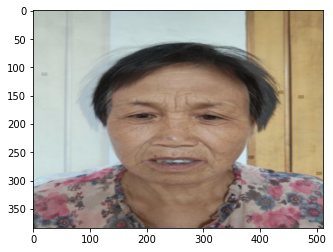

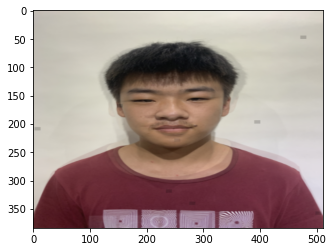

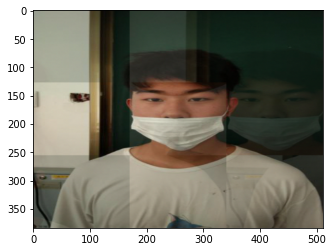

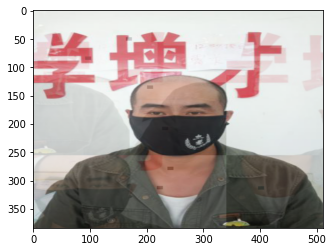

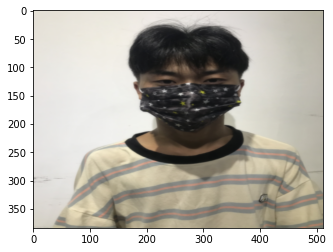

In [34]:
augs = [
    albumentations.HorizontalFlip(always_apply=True),
    albumentations.Blur(always_apply=True),
    albumentations.OneOf(
    [albumentations.ShiftScaleRotate(always_apply=True),
    albumentations.GaussNoise(always_apply=True)]
    ),
    albumentations.Cutout(always_apply=True),
    albumentations.IAAPiecewiseAffine(always_apply=True),
    albumentations.RandomGridShuffle(always_apply=True)
]

batch_size = 5

dataset = MaskDataset(label_path=path,
    transform=albumentations.Compose([
        AugMix(width=3, depth=2, alpha=.2, p=1., augmentations=augs),
        albumentations.Resize(384, 512),
        albumentations.pytorch.transforms.ToTensorV2()
    ])
)

loader = DataLoader(
    dataset,
    batch_size=batch_size,
    num_workers=4,
    shuffle=True
)

for i, (iamges, label, mask, gender, age) in enumerate(loader):
    for j in range(batch_size):
        iamge = iamges[j]
        plt.imshow(np.array(iamge.permute(1, 2, 0)))
        plt.show()
    break